# Medicare Part D Spending and Utilization, Calendar Years 2015 - 2019

The objective of this project is to explore the 'Medicare Part D Drug Spending and Utilization, Calendar Years 2015 - 2019' dataset (available at: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Information-on-Prescription-Drugs/MedicarePartD). I will first identify some high-level insights across the whole dataset, then take a deep-dive into some specific manufacturers and products.

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# adjust pandas & seaborn display preferences
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(12,10)})
sns.set_palette('pastel')

In [3]:
# import the dataset

# for purposes of this analysis, I used MS Excel to reformat the dataset into long format
# and converted to a CSV file for simpler readibility in pandas. No data points were transformed/reformatted in Excel
 

df = pd.read_csv('cms_data_mftr.csv')

df.head(5)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$134,200.53","718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$197,091.75","986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,"$14,927.36","2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,"$3,548,716.76","642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,"$6,634,496.81","1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


In [7]:
df_indication = pd.read_csv('cms_data_drug_use.csv')
df_indication.head()

,Brand Name,Generic Name,Drug Uses**
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Drug uses not available
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Drug uses not available
2,Abacavir,Abacavir Sulfate,This drug is used with other HIV medications t...
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,This product contains 2 drugs: abacavir and la...
4,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,"This product contains 3 drugs: abacavir, lamiv..."


Let's see how many observations we have in the dataset.

In [8]:
len(df)

49775

There are ~50,000 observations. Spread across 5 years (2015 - 2019), that's roughly 10,000 unique brand name drugs reimbursed by CMS each year on average. Let's take a look at what kind of data this dataset contains.

In [9]:
df.dtypes

Brand Name                                     object
Generic Name                                   object
Manufacturer                                   object
Year                                            int64
Total Spending                                 object
Total Dosage Units                             object
Total Claims                                   object
Total \nBeneficiaries                          object
Average Spending Per Dosage Unit (Weighted)    object
Average \nSpending Per Claim                   object
Average \nSpending Per Beneficiary             object
Outlier \nFlag                                 object
dtype: object

I see all the columns except for 'Year' are likely string types and not numerical values as needed to perform analyses on the data.  I will need to clean the data before proceeding with analysis.

# Data Cleaning

In [10]:
df.head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$134,200.53","718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$197,091.75","986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,"$14,927.36","2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,"$3,548,716.76","642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,"$6,634,496.81","1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


In [11]:
# making a copy to keep the original raw dataset intact for future reference

df2 = df.copy()

First off, I will strip all string values of any unnecessary white space that may interfere with the data cleaning. Then i'll get rid of any unneeded punctuation/characters and convert to integer and float data types so I can analyze with pandas.

In [12]:
df.columns

Index(['Brand Name', 'Generic Name', 'Manufacturer', 'Year', 'Total Spending',
       'Total Dosage Units', 'Total Claims', 'Total \nBeneficiaries',
       'Average Spending Per Dosage Unit (Weighted)',
       'Average \nSpending Per Claim', 'Average \nSpending Per Beneficiary',
       'Outlier \nFlag'],
      dtype='object')

In [13]:
df2['Brand Name'] = df2['Brand Name'].str.strip()
df2['Generic Name'] = df2['Generic Name'].str.strip()
df2['Manufacturer'] = df2['Manufacturer'].str.strip()
df2['Total Spending'] = df2['Total Spending'].str.strip()
df2['Total Dosage Units'] = df2['Total Dosage Units'].str.strip()
df2['Total Claims'] = df2['Total Claims'].str.strip()
df2['Total \nBeneficiaries'] = df2['Total \nBeneficiaries'].str.strip()
df2['Average Spending Per Dosage Unit (Weighted)'] = df2['Average Spending Per Dosage Unit (Weighted)'].str.strip()
df2['Average \nSpending Per Claim'] = df2['Average \nSpending Per Claim'].str.strip()
df2['Average \nSpending Per Beneficiary'] = df2['Average \nSpending Per Beneficiary'].str.strip()
df2['Outlier \nFlag'] = df2['Outlier \nFlag'].str.strip()

In [14]:
# beginning with total spending

df2['Total Spending'] = df2['Total Spending'].str.replace('$', '')
df2['Total Spending'] = df2['Total Spending'].str.replace(',', '')
df2['Total Spending'] = df2['Total Spending'].str[:-3]

#df2['Total Spending'] = df2['Total Spending'].astype(float)
df2.head()

<ipython-input-14-0caa5de22d2f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Spending'] = df2['Total Spending'].str.replace('$', '')


,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,134200,"718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,197091,"986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,14927,"2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3548716,"642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6634496,"1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


So now it looks like the 'Total Spending' column is almost ready to go, but it is still a string data type. I noticed there are some values that contain a single or double space instead of null (to indicate a missing value), so I will replace any such data points with zero values. Let's see the dataframe that results.

In [15]:
# replace non-empty cells containing a space or double-space with a zero value

df2 = df2.replace('', 0)
df2 = df2.replace(' ', 0)
df2.dtypes

Brand Name                                     object
Generic Name                                   object
Manufacturer                                   object
Year                                            int64
Total Spending                                 object
Total Dosage Units                             object
Total Claims                                   object
Total \nBeneficiaries                          object
Average Spending Per Dosage Unit (Weighted)    object
Average \nSpending Per Claim                   object
Average \nSpending Per Beneficiary             object
Outlier \nFlag                                 object
dtype: object

In [16]:
df2['Outlier \nFlag'].value_counts()

0    36619
0     9565
1     3591
Name: Outlier \nFlag, dtype: int64

Now I will clean each column and convert each to integer or float values to allow for analysis.

In [17]:
df2['Total Dosage Units'] = df2['Total Dosage Units'].str.replace(',','').str.replace('$', '').str.strip().astype(float)
df2['Total Spending'] = df2['Total Spending'].astype(float)
df2['Total Claims'] = df2['Total Claims'].str.replace(',','').str.replace('$', '').str.strip().astype(float)
df2['Total \nBeneficiaries'] = df2['Total \nBeneficiaries'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df2['Average Spending Per Dosage Unit (Weighted)'] = df2['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df2['Average \nSpending Per Claim'] = df2['Average \nSpending Per Claim'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df2['Average \nSpending Per Beneficiary'] = df2['Average \nSpending Per Beneficiary'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
#df2['Outlier \nFlag'] = df2['Outlier \nFlag'].str.strip().astype(int)

<ipython-input-17-ad4f961730e8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Dosage Units'] = df2['Total Dosage Units'].str.replace(',','').str.replace('$', '').str.strip().astype(float)
<ipython-input-17-ad4f961730e8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Claims'] = df2['Total Claims'].str.replace(',','').str.replace('$', '').str.strip().astype(float)
<ipython-input-17-ad4f961730e8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total \nBeneficiaries'] = df2['Total \nBeneficiarie

In [18]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                          float64
Average Spending Per Dosage Unit (Weighted)    float64
Average \nSpending Per Claim                   float64
Average \nSpending Per Beneficiary             float64
Outlier \nFlag                                  object
dtype: object

In [19]:
df2.head(10)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,134200.0,718948.0,5802.0,2290.0,0.19,23.13,58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,197091.0,986070.0,7889.0,4330.0,0.20,24.98,45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,14927.0,2629.0,48.0,21.0,5.68,310.99,710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3548716.0,642855.0,10000.0,2184.0,5.52,354.87,1624.87,0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6634496.0,1205223.0,19505.0,3696.0,5.50,340.14,1795.05,0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,2127587.0,377106.0,6228.0,1823.0,5.64,341.62,1167.08,0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
8,Abacavir,Abacavir Sulfate,Mylan,2015,12193567.0,2185794.0,33238.0,6075.0,5.58,366.86,2007.17,0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
# original dataframe for comparison

df.head(10)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$134,200.53","718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$197,091.75","986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,"$14,927.36","2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,"$3,548,716.76","642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,"$6,634,496.81","1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,"$2,127,587.71","377,106","6,228","1,823",$5.64,$341.62,"$1,167.08",0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,,,,,,,,
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,,,,,,,,
8,Abacavir,Abacavir Sulfate,Mylan,2015,"$12,193,567.12","2,185,794","33,238","6,075",$5.58,$366.86,"$2,007.17",0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,,,,,,,,


Now I have all my correct data types - just have to take care of the missing values. After comparing with the original dataframe above, I think it is fair to assume the missing values mean there were no Medicare claims for that brand during that year.  I will go ahead and replace all null values with zeroes.

In [21]:
df2.replace(np.NaN, 0, inplace=True)

In [22]:
df2.isnull().sum()

Brand Name                                     0
Generic Name                                   0
Manufacturer                                   0
Year                                           0
Total Spending                                 0
Total Dosage Units                             0
Total Claims                                   0
Total \nBeneficiaries                          0
Average Spending Per Dosage Unit (Weighted)    0
Average \nSpending Per Claim                   0
Average \nSpending Per Beneficiary             0
Outlier \nFlag                                 0
dtype: int64

Now my dataframe is ready to analyze, with all the data clean and all missing values imputed.  Now I can get into some analyses.

# High-Level Overview

### First, I want to take a high-level overview of CMS' total spending for the years 2015 - 2019. I will plot overall spending and claims, the top 10 drugs by total spending and total number of claims for each year, then plot the top manufacturers by total spending and claims (across all brands) for each year.

In [23]:
df2['Total Spending'].describe()

count    4.977500e+04
mean     1.573807e+07
std      1.209327e+08
min      0.000000e+00
25%      2.805500e+03
50%      1.962500e+05
75%      3.335490e+06
max      7.305512e+09
Name: Total Spending, dtype: float64

In [24]:
df2['Total Claims'].describe()

count    4.977500e+04
mean     1.473823e+05
std      7.019962e+05
min      0.000000e+00
25%      5.100000e+01
50%      1.919000e+03
75%      3.115000e+04
max      2.460956e+07
Name: Total Claims, dtype: float64

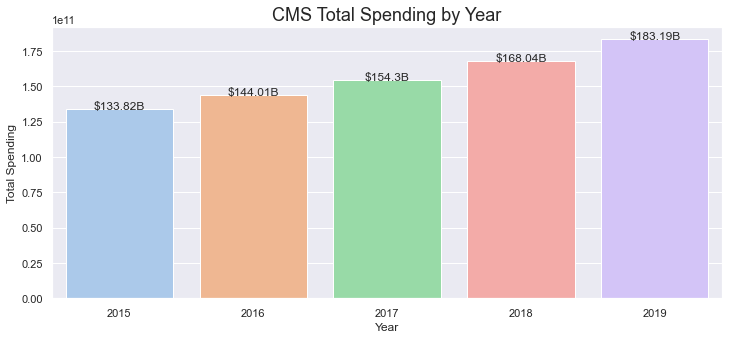

In [25]:
fig = plt.figure(figsize=(12,5))
ax = sns.barplot(data=df2, x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Total Spending by Year', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '${}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

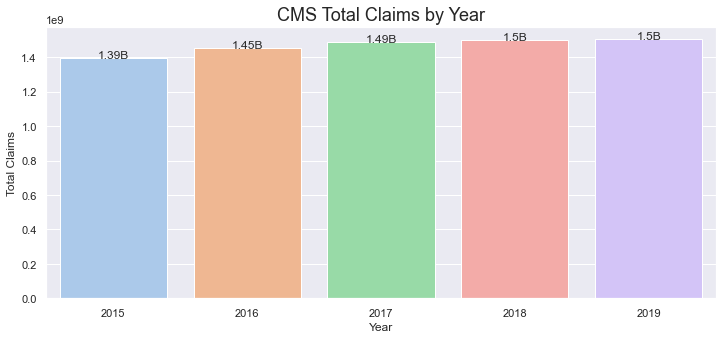

In [26]:
fig = plt.figure(figsize=(12,5))
ax = sns.barplot(data=df2, x='Year', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Total Claims by Year', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '{}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

Total CMS Part D spending increased from ~USD 134 billion in 2015 to ~USD 183 billion in 2019, while total number of claims increased by ~100 million during this time.

In [27]:
df_2015 = df2[df2['Year'] == 2015]
df_2016 = df2[df2['Year'] == 2016]
df_2017 = df2[df2['Year'] == 2017]
df_2018 = df2[df2['Year'] == 2018]
df_2019 = df2[df2['Year'] == 2019]

In [28]:
df_2015.sort_values(by='Total Spending', ascending=False).head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
4175,Harvoni,Ledipasvir/Sofosbuvir,Gilead Sciences,2015,7.030633e+09,6237573.0,225766.0,75722.0,1127.14,31141.24,92847.96,0
2130,Crestor,Rosuvastatin Calcium,Astrazeneca,2015,2.883122e+09,416825307.0,8710583.0,1733083.0,6.92,330.99,1663.58,0
4996,Lantus Solostar,"Insulin Glargine,Hum.Rec.Anlog",Sanofi-Aventis,2015,2.483335e+09,100568924.0,4859914.0,1041388.0,24.69,510.98,2384.64,0
184,Advair Diskus,Fluticasone Propion/Salmeterol,Glaxosmithkline,2015,2.270016e+09,430415878.0,5648232.0,1321497.0,5.28,401.90,1717.76,0
8486,Spiriva,Tiotropium Bromide,Boehringer Ing.,2015,2.191466e+09,212238265.0,5446298.0,1142136.0,10.33,402.38,1918.74,0


I see top drug by spend in 2015 was Gilead's Harvoni with ~$7 billion in total spending, roughly 2.5 times the amount of the number 2 product, AstraZeneca's Crestor. Now I will visualize some of the data to better understand some of the trends in CMS claims and spending.

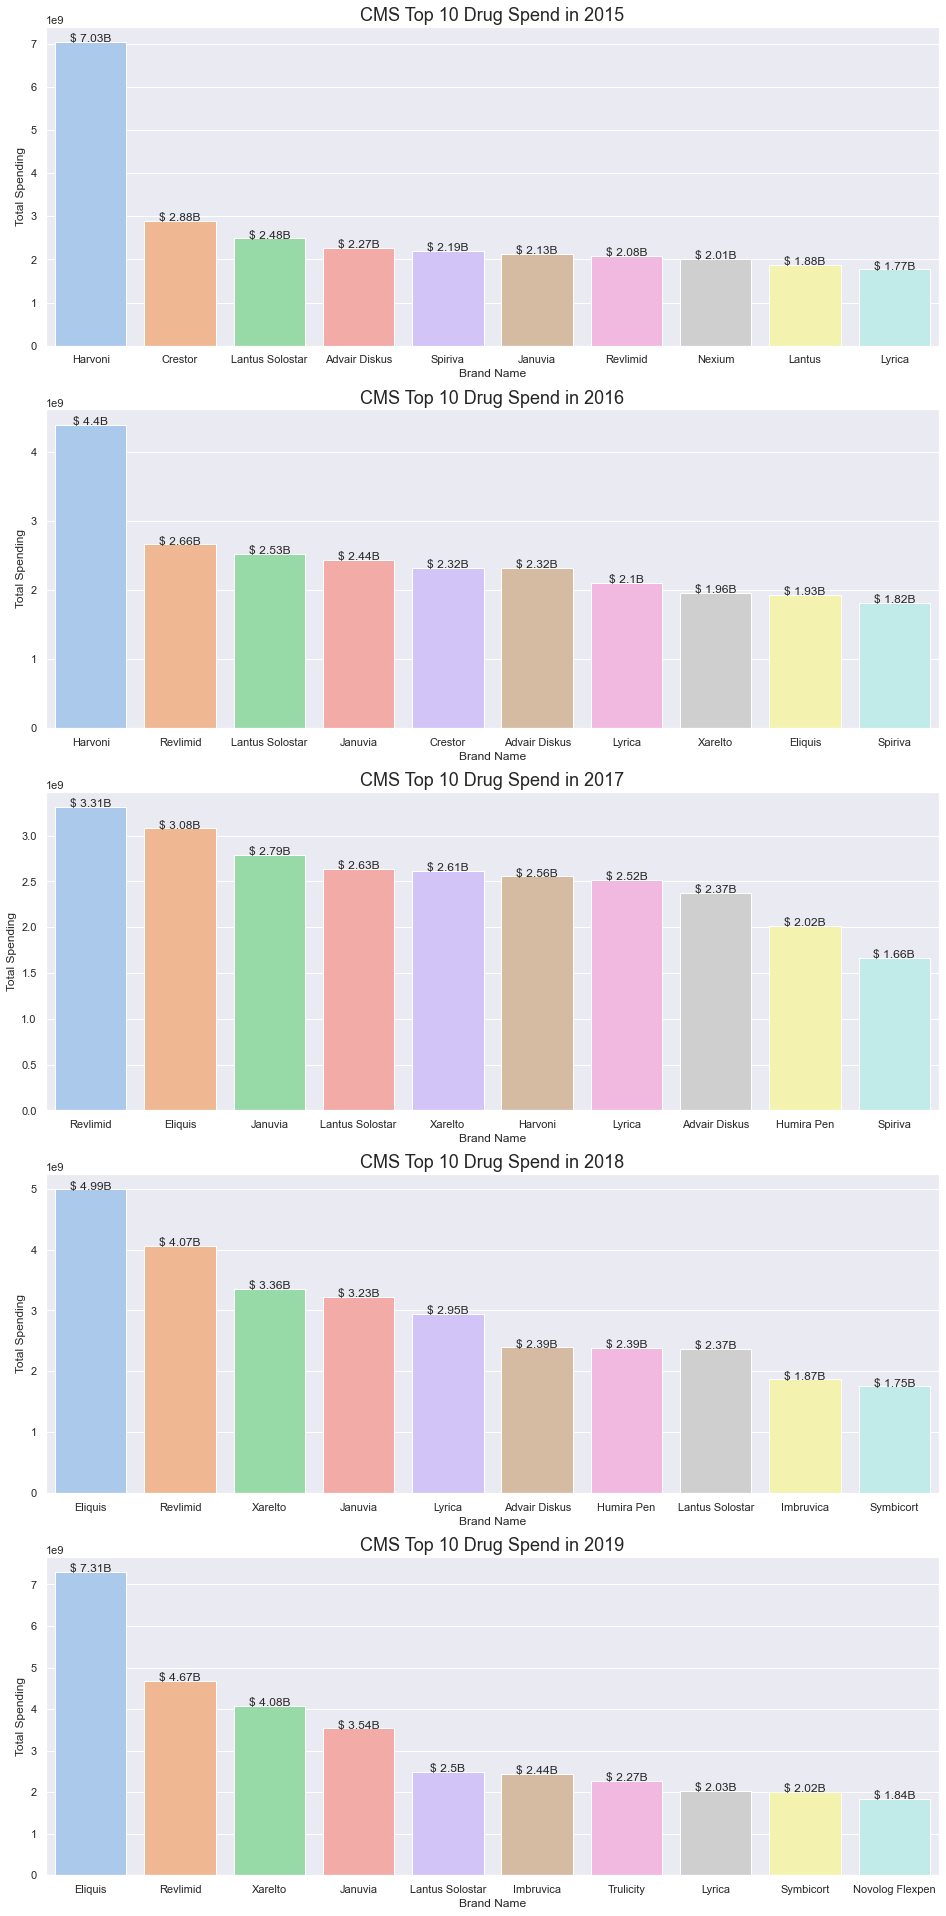

In [29]:
fig = plt.figure(figsize=(16, 34)).tight_layout(w_pad=3.0, h_pad=3.0)

plt.subplot(511)
ax = sns.barplot(data=df_2015.groupby(by=['Year', 'Brand Name'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum)
ax.set_title('CMS Top 10 Drug Spend in 2015', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(512)
ax = sns.barplot(data=df_2016.groupby(by=['Year', 'Brand Name'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum)
ax.set_title('CMS Top 10 Drug Spend in 2016', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(513)    
ax = sns.barplot(data=df_2017.groupby(by=['Year', 'Brand Name'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum)
ax.set_title('CMS Top 10 Drug Spend in 2017', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(514)
ax = sns.barplot(data=df_2018.groupby(by=['Year', 'Brand Name'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum)
ax.set_title('CMS Top 10 Drug Spend in 2018', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(515)
ax = sns.barplot(data=df_2019.groupby(by=['Year', 'Brand Name'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum)
ax.set_title('CMS Top 10 Drug Spend in 2019', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.show()

It is interesting noting Harvoni's rapid decline in spend during these 5 years, with Eliquis rising significantly and Revlimid growing steadily in total spend. Now I want to look at the top 10 manufacturers by total spending across all their products.

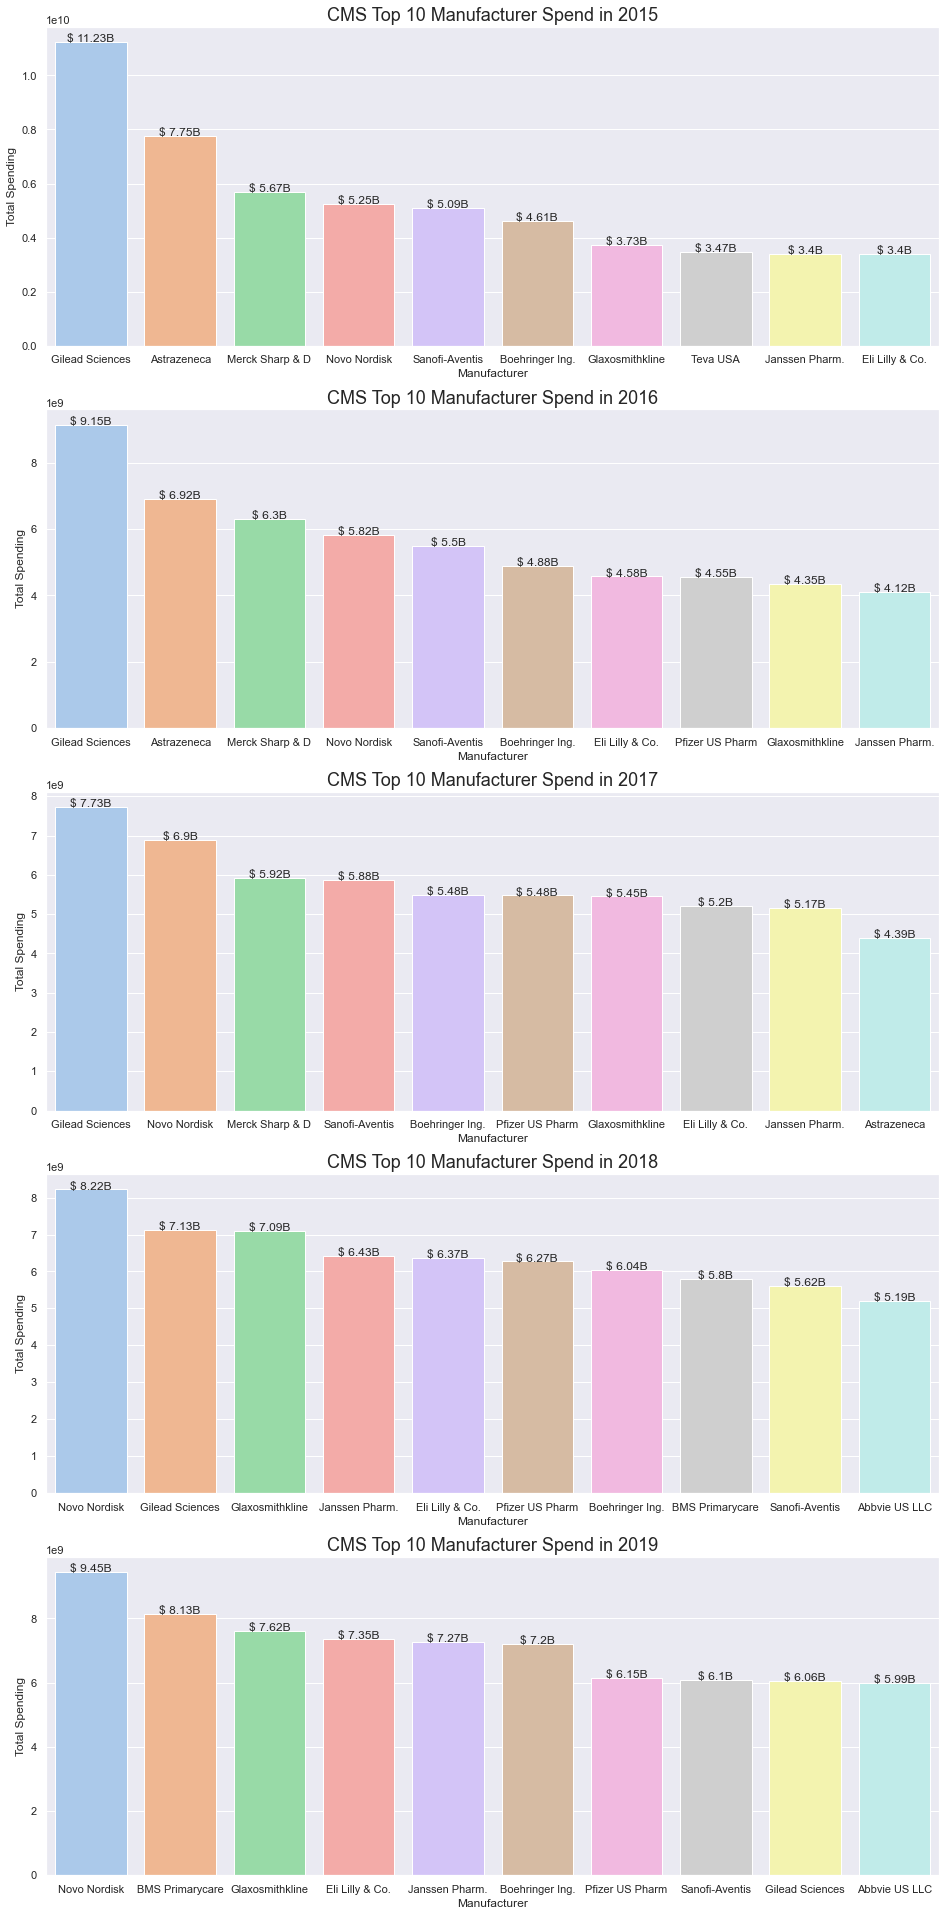

In [30]:
fig = plt.figure(figsize=(16, 34)).tight_layout(w_pad=3.0, h_pad=3.0)

plt.subplot(511)
ax = sns.barplot(data=df_2015.groupby(by=['Year', 'Manufacturer'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Manufacturer', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturer Spend in 2015', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(512)
ax = sns.barplot(data=df_2016.groupby(by=['Year', 'Manufacturer'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Manufacturer', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturer Spend in 2016', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(513)    
ax = sns.barplot(data=df_2017.groupby(by=['Year', 'Manufacturer'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Manufacturer', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturer Spend in 2017', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(514)
ax = sns.barplot(data=df_2018.groupby(by=['Year', 'Manufacturer'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Manufacturer', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturer Spend in 2018', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.subplot(515)
ax = sns.barplot(data=df_2019.groupby(by=['Year', 'Manufacturer'])['Total Spending'].sum().reset_index().sort_values(by='Total Spending', ascending=False).head(10), x='Manufacturer', y='Total Spending', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturer Spend in 2019', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),ha = 'center')

plt.show()

Interesting that Gilead's total spend by 2019 was reduced to almost half of 2015's total spend of USD ~11.2 Billion.

Now I want to look at the brand name drugs and manufacturers who had the highest number of CMS claims in the dataset.

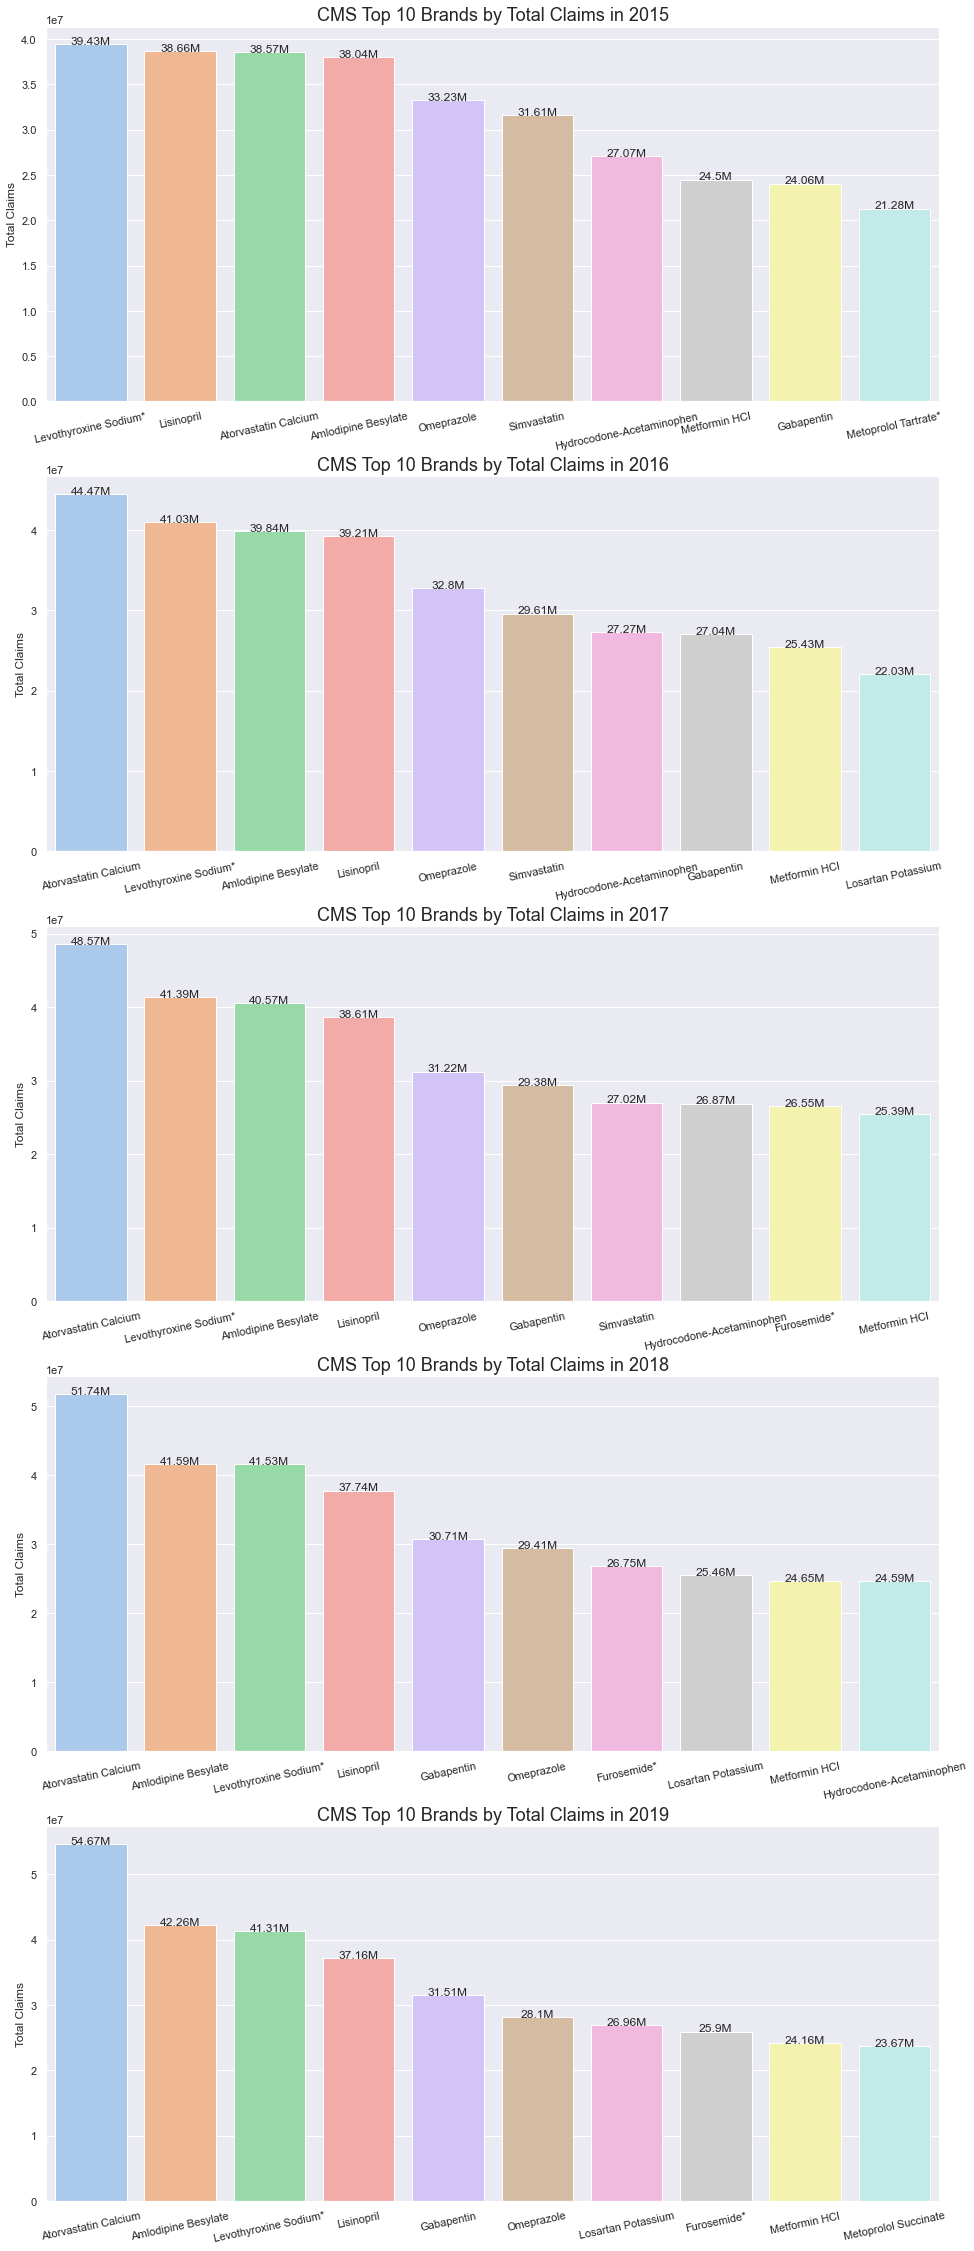

In [31]:
fig = plt.figure(figsize=(16, 40)).tight_layout(w_pad=3.0, h_pad=20.0)

plt.subplot(511)
ax = sns.barplot(data=df_2015.groupby(by=['Year', 'Brand Name'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum)
ax.set_title('CMS Top 10 Brands by Total Claims in 2015', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 2)),ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(12)

plt.subplot(512)
ax = sns.barplot(data=df_2016.groupby(by=['Year', 'Brand Name'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims')
ax.set_title('CMS Top 10 Brands by Total Claims in 2016', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 2)),ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(12)
    
plt.subplot(513)    
ax = sns.barplot(data=df_2017.groupby(by=['Year', 'Brand Name'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims')
ax.set_title('CMS Top 10 Brands by Total Claims in 2017', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 2)),ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(12)
    
plt.subplot(514)
ax = sns.barplot(data=df_2018.groupby(by=['Year', 'Brand Name'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims')
ax.set_title('CMS Top 10 Brands by Total Claims in 2018', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 2)),ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(12)
    
plt.subplot(515)
ax = sns.barplot(data=df_2019.groupby(by=['Year', 'Brand Name'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims')
ax.set_title('CMS Top 10 Brands by Total Claims in 2019', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 2)),ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(12)
    
plt.show()

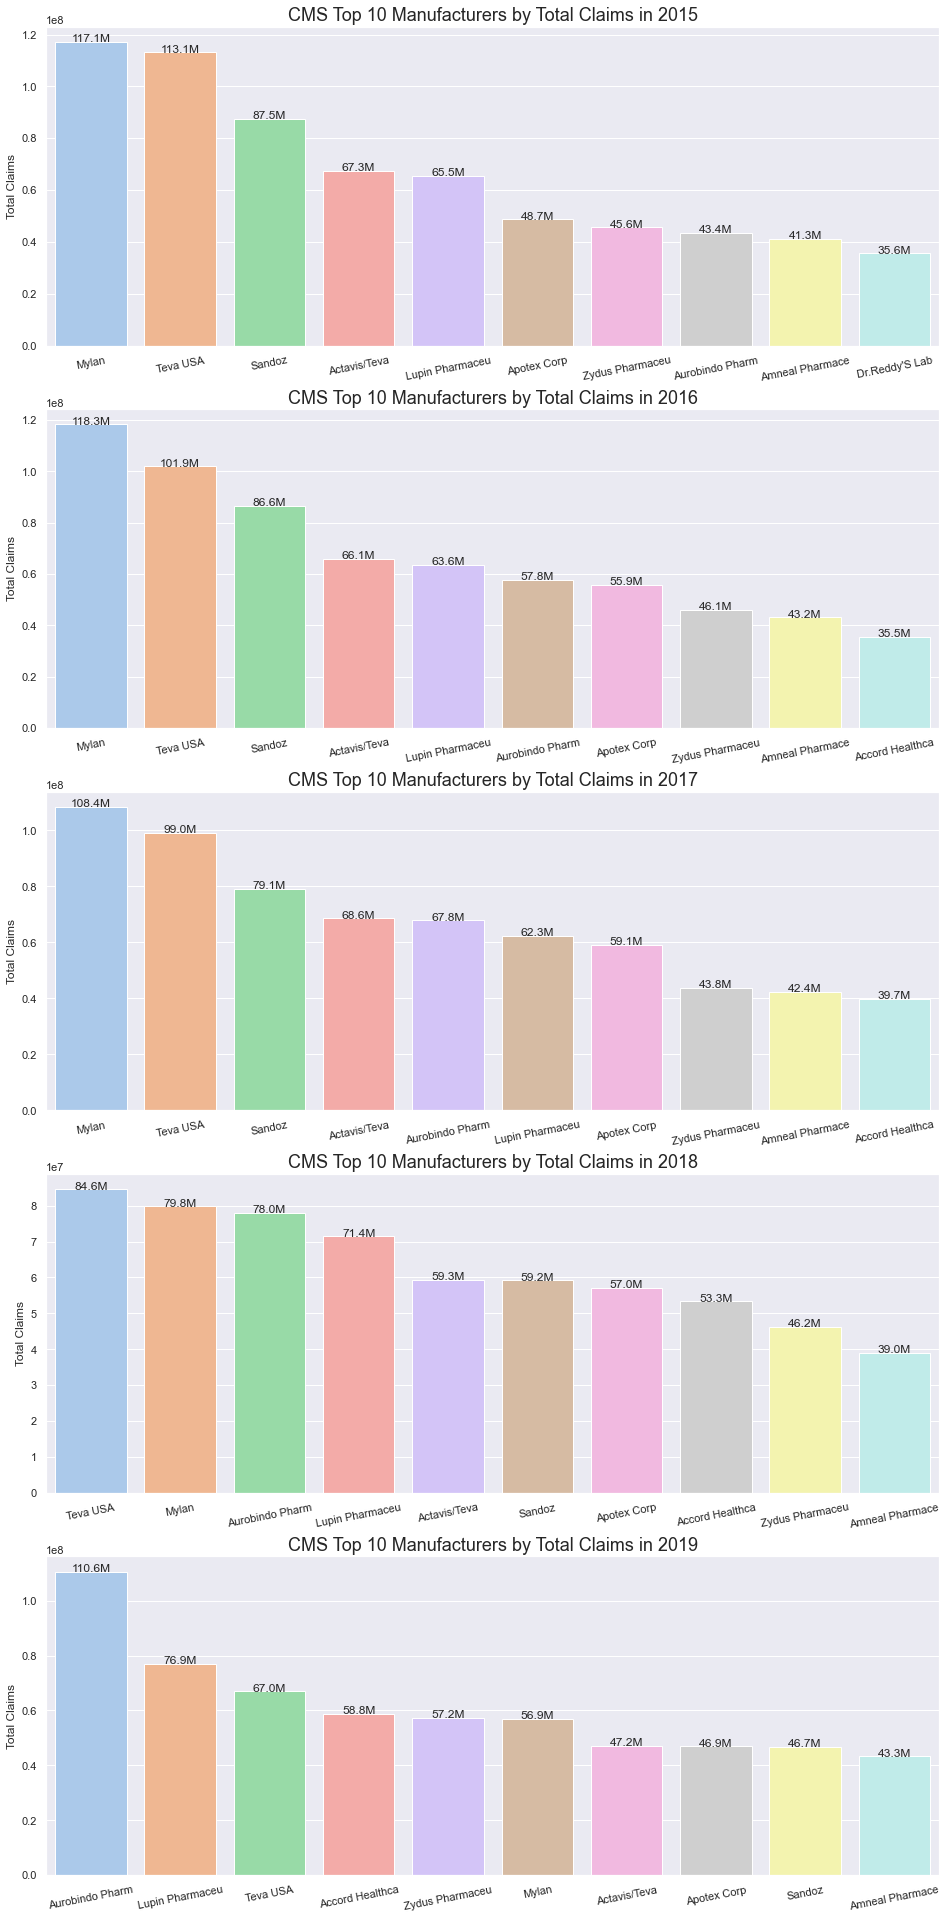

In [32]:
fig = plt.figure(figsize=(16, 34)).tight_layout(w_pad=3.0, h_pad=6.0)

plt.subplot(511)
ax = sns.barplot(data=df_2015.groupby(by=['Year', 'Manufacturer'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Manufacturer', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturers by Total Claims in 2015', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)), ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(11)
    
plt.subplot(512)
ax = sns.barplot(data=df_2016.groupby(by=['Year', 'Manufacturer'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Manufacturer', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturers by Total Claims in 2016', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)), ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(11)
    
plt.subplot(513)    
ax = sns.barplot(data=df_2017.groupby(by=['Year', 'Manufacturer'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Manufacturer', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturers by Total Claims in 2017', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)), ha = 'center')
    
for item in ax.get_xticklabels():
    item.set_rotation(11)
    
plt.subplot(514)
ax = sns.barplot(data=df_2018.groupby(by=['Year', 'Manufacturer'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Manufacturer', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturers by Total Claims in 2018', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)), ha = 'center')

for item in ax.get_xticklabels():
    item.set_rotation(11)
    
plt.subplot(515)
ax = sns.barplot(data=df_2019.groupby(by=['Year', 'Manufacturer'])['Total Claims'].sum().reset_index().sort_values(by='Total Claims', ascending=False).head(10), x='Manufacturer', y='Total Claims', estimator=sum, ci=None)
ax.set_title('CMS Top 10 Manufacturers by Total Claims in 2019', fontsize=18)
ax.set_xlabel('')

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)), ha = 'center')
    
for item in ax.get_xticklabels():
    item.set_rotation(11)
    
plt.show()

From 2015 to 2019 the number of Medicare claims filed for Aurobindo products more than doubled, from ~40M claims to over 110M claims.  Claims for Mylan products dropped from 117M claims in 2015 to 57M claims in 2019. Let's see the top 10 Mylan and Aurobindo products by number of claims for 2015 and 2019.

In [33]:
aurobindo_2015 = df_2015[df_2015['Manufacturer'].str.match('.*[Aa]urobindo.*')]
aurobindo_2019 = df_2019[df_2019['Manufacturer'].str.match('.*[Aa]urobin.*')]
print('2015: ', len(aurobindo_2015))
print('2019: ', len(aurobindo_2019))

2015:  198
2019:  198


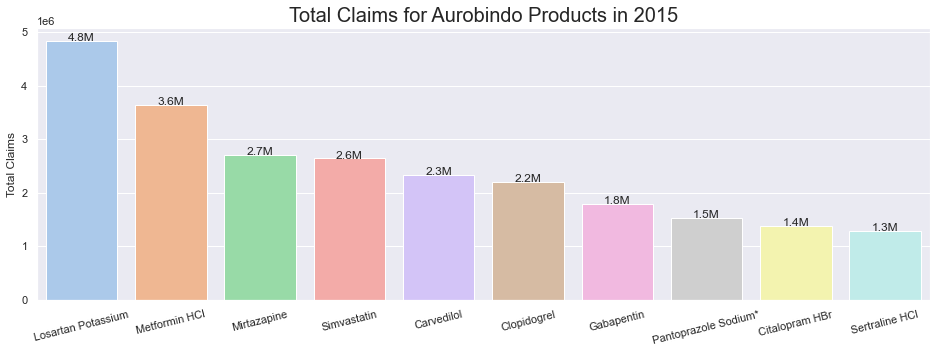

In [34]:
fig = plt.figure(figsize=(16,5))
ax = sns.barplot(data=aurobindo_2015.sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
ax.set_title('Total Claims for Aurobindo Products in 2015', fontsize=20)
ax.set_xlabel('')
for item in ax.get_xticklabels():
    item.set_rotation(14)
    
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)),ha = 'center')

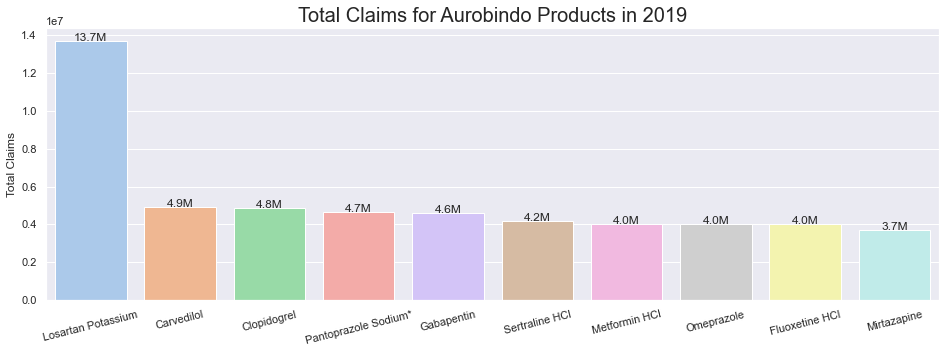

In [35]:
fig = plt.figure(figsize=(16,5))
ax = sns.barplot(data=aurobindo_2019.sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
ax.set_title('Total Claims for Aurobindo Products in 2019', fontsize=20)
ax.set_xlabel('')
for item in ax.get_xticklabels():
    item.set_rotation(14)
    
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)),ha = 'center')

Claims for Losartan Potassium more than doubled between 2015 and 2019, with Losartan Potassium being a clear leader in number of claims for Aurobindo in 2019.

In [36]:
mylan_2015 = df_2015[df_2015['Manufacturer'].str.match('.*[Mm]ylan.*')]
mylan_2019 = df_2019[df_2019['Manufacturer'].str.match('.*[Mm]ylan.*')]
print('2015: ', len(mylan_2015))
print('2019: ', len(mylan_2019))

2015:  577
2019:  577


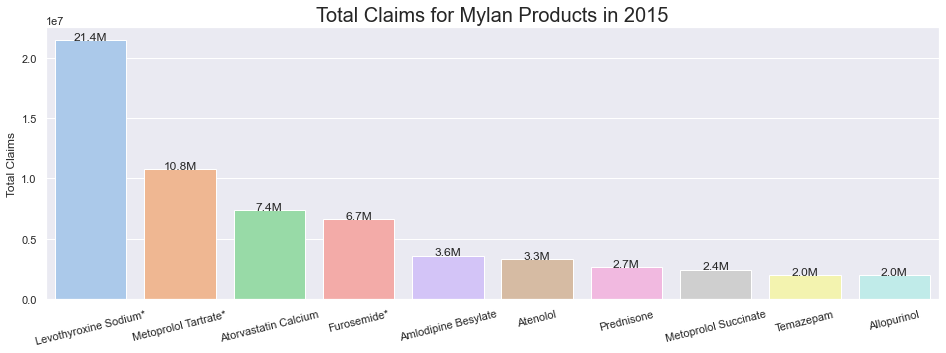

In [37]:
fig = plt.figure(figsize=(16,5))
ax = sns.barplot(data=mylan_2015.sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
ax.set_title('Total Claims for Mylan Products in 2015', fontsize=20)
ax.set_xlabel('')
for item in ax.get_xticklabels():
    item.set_rotation(14)
    
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)),ha = 'center')

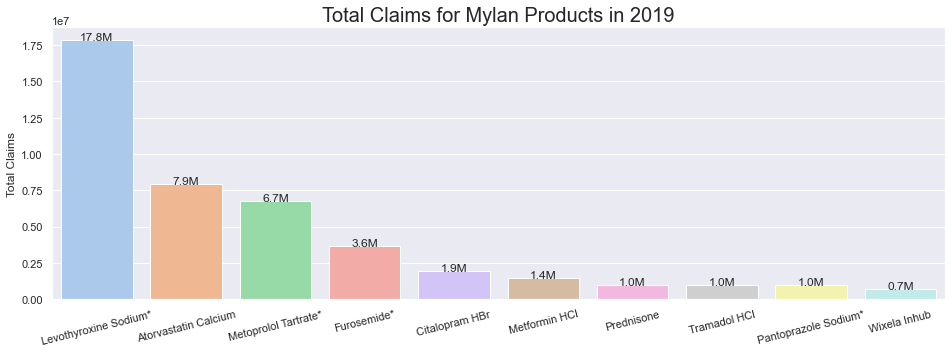

In [38]:
fig = plt.figure(figsize=(16,5))
ax = sns.barplot(data=mylan_2019.sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
ax.set_title('Total Claims for Mylan Products in 2019', fontsize=20)
ax.set_xlabel('')
for item in ax.get_xticklabels():
    item.set_rotation(14)
    
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}M'.format(round(p.get_height()/1000000, 1)),ha = 'center')

Total number of claims for Levothyroxine Sodium decreased from 2015 to 2019, though the drug remains Mylan's top drug by number of claims by a wide margin.

# Dupixent Analysis

###  I will now take a deeper look at some specific drugs and manufacturers to identify anything of interest.  I will first take a look at Dupixent (dupilumab), a monoclonal antibody developed by Sanofi & Regeneron indicated for atopic dermatitis, eosinophilic asthma and CRSwNP, with ongoing clinical trials in additional indications.

In [39]:
df_dupi = df2[df2['Generic Name'].str.match('^[Dd]upilu.*')== True]
df_dupi.head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
2951,Dupixent,Dupilumab,Sanofi-Aventis,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
12906,Dupixent,Dupilumab,Sanofi-Aventis,2016,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
22861,Dupixent,Dupilumab,Sanofi-Aventis,2017,26650729.0,37059.0,8373.0,1984.0,719.14,3182.94,13432.83,0
32816,Dupixent,Dupilumab,Sanofi-Aventis,2018,101803038.0,138330.3,32049.0,5220.0,736.25,3176.48,19502.50,0
42771,Dupixent,Dupilumab,Sanofi-Aventis,2019,265809524.0,340072.0,81158.0,13171.0,790.85,3275.21,20181.42,0


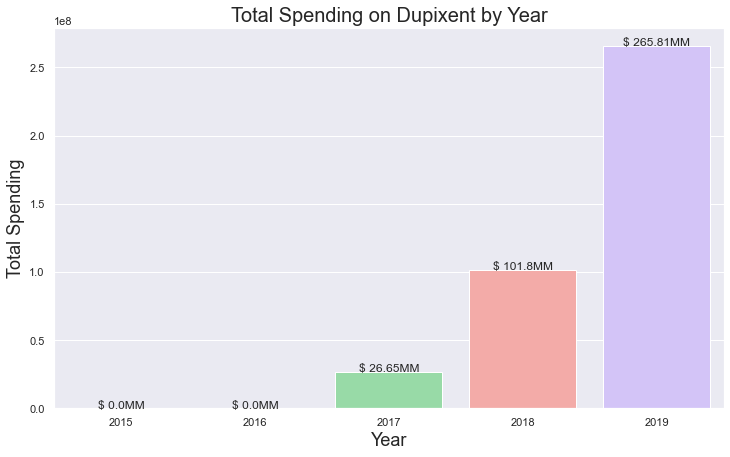

In [40]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df_dupi, x='Year', y='Total Spending')
ax.set_title('Total Spending on Dupixent by Year', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110,s = '$ {}MM'.format(round(p.get_height()/1000000, 2)),ha = 'center')

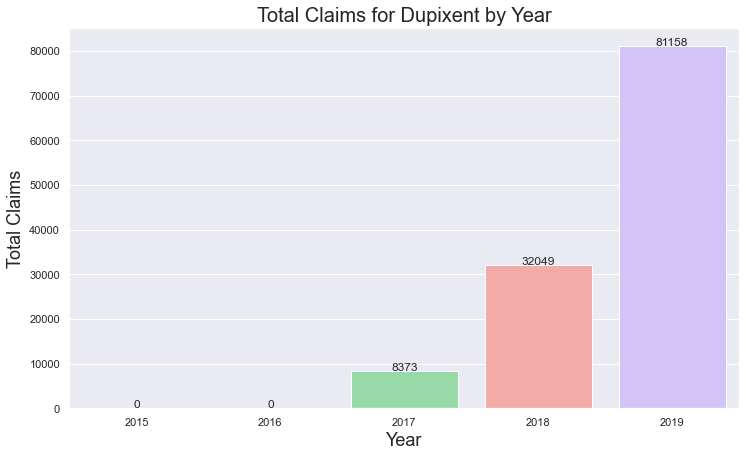

In [41]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df_dupi, x='Year', y='Total Claims')
ax.set_title('Total Claims for Dupixent by Year', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Claims', fontsize=18)
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),y = p.get_height()+110, s = '{}'.format(round(p.get_height())), ha = 'center')

I also want to see how many claims are filed per beneficiary for each year, on average.

In [42]:
df_dupi['Total Claims Per Beneficiary'] = df_dupi['Total Claims']/df_dupi['Total \nBeneficiaries']
df_dupi.fillna(0)

<ipython-input-42-d5add5f6c06b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupi['Total Claims Per Beneficiary'] = df_dupi['Total Claims']/df_dupi['Total \nBeneficiaries']


,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Total Claims Per Beneficiary
2951,Dupixent,Dupilumab,Sanofi-Aventis,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0.000000
12906,Dupixent,Dupilumab,Sanofi-Aventis,2016,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0.000000
22861,Dupixent,Dupilumab,Sanofi-Aventis,2017,26650729.0,37059.0,8373.0,1984.0,719.14,3182.94,13432.83,0,4.220262
32816,Dupixent,Dupilumab,Sanofi-Aventis,2018,101803038.0,138330.3,32049.0,5220.0,736.25,3176.48,19502.50,0,6.139655
42771,Dupixent,Dupilumab,Sanofi-Aventis,2019,265809524.0,340072.0,81158.0,13171.0,790.85,3275.21,20181.42,0,6.161871


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


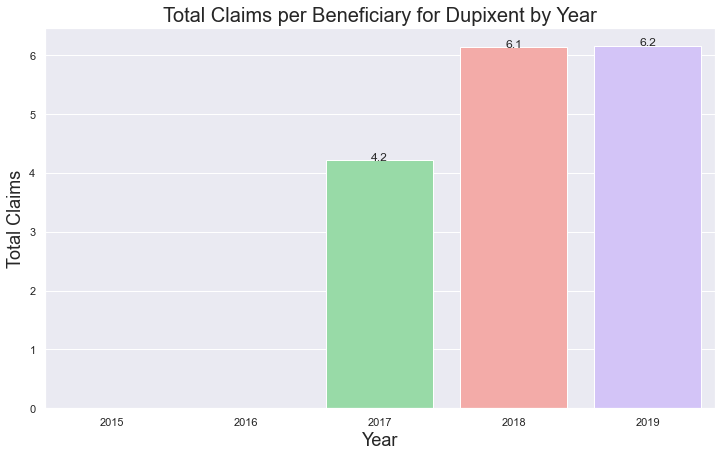

In [43]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df_dupi, x='Year', y='Total Claims Per Beneficiary')
ax.set_title('Total Claims per Beneficiary for Dupixent by Year', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Claims', fontsize=18)
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height(), s = '{}'.format(round(p.get_height(), 1)), ha = 'center')

In [44]:
# df_dupi.head()

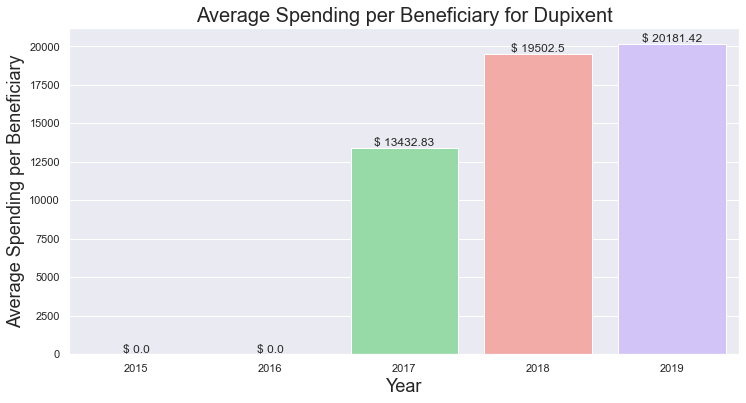

In [45]:
fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(data=df_dupi, x='Year', y='Average \nSpending Per Beneficiary')
ax.set_title('Average Spending per Beneficiary for Dupixent', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Average Spending per Beneficiary', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+110, s = '$ {}'.format(round(p.get_height(), 2)), ha = 'center')

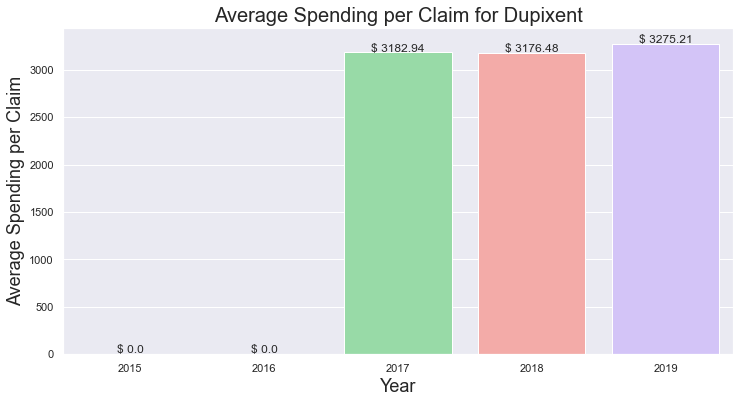

In [46]:
fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(data=df_dupi, x='Year', y='Average \nSpending Per Claim')
ax.set_title('Average Spending per Claim for Dupixent', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Average Spending per Claim', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+10, s = '$ {}'.format(round(p.get_height(), 2)), ha = 'center')

Now, instead of a specific brand name, I want to explore a generic molecule that has numerous manufacturers and brand names - I will take a look at abacavir, an antiviral treatment for HIV.

# Abacavir Analysis

In [47]:
abacavir = df2[df2['Generic Name'].str.match('.*[Aa]bacavir.*')]
abacavir.head(10)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
2,Abacavir,Abacavir Sulfate,AHP,2015,14927.0,2629.0,48.0,21.0,5.68,310.99,710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3548716.0,642855.0,10000.0,2184.0,5.52,354.87,1624.87,0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6634496.0,1205223.0,19505.0,3696.0,5.50,340.14,1795.05,0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,2127587.0,377106.0,6228.0,1823.0,5.64,341.62,1167.08,0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
8,Abacavir,Abacavir Sulfate,Mylan,2015,12193567.0,2185794.0,33238.0,6075.0,5.58,366.86,2007.17,0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
10,Abacavir,Abacavir Sulfate,Strides Pharma,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
11,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,Aurobindo Pharm,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0


In [48]:
abacavir['Brand Name'].value_counts()

Abacavir                          45
Abacavir-Lamivudine               30
Trizivir                           5
Ziagen                             5
Triumeq                            5
Abacavir-Lamivudine-Zidovudine     5
Epzicom                            5
Name: Brand Name, dtype: int64

In [49]:
abacavir['Generic Name'].value_counts()

Abacavir Sulfate                  50
Abacavir Sulfate/Lamivudine       35
Abacavir/Lamivudine/Zidovudine    10
Abacavir/Dolutegravir/Lamivudi     5
Name: Generic Name, dtype: int64

In [50]:
abacavir['Manufacturer'].value_counts()

Viiv Healthcare    20
Aurobindo Pharm    10
Lupin Pharmaceu    10
Cipla USA, Inc.    10
Mylan               5
AHP                 5
Burel Pharmaceu     5
Camber Pharmace     5
Teva USA            5
Major Pharmaceu     5
Strides Pharma      5
Apotex Corp         5
Rising Pharm        5
Prasco Labs         5
Name: Manufacturer, dtype: int64

It seems there are several brand name versions of abacavir which were reimbursed by CMS during this time period, including double and triple combination therapies.  Viiv Healthcare seems to dominate the Medicare Part D market in abacavir, with 4 brand name abacavir products reimbursed by CMS during this time. I'll first take a look across all brands/manufacturers in totality, then get into a bit more detail.

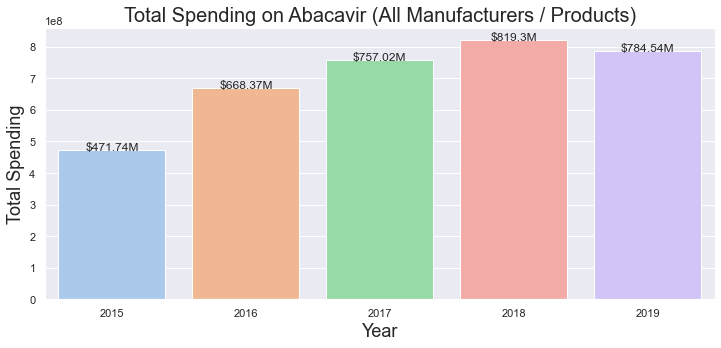

In [51]:
fig = plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df2[df2['Generic Name'].str.match('.*[Aa]bacavir.*')], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir (All Manufacturers / Products)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+10, s = '${}M'.format(round(p.get_height()/1000000, 2)), ha = 'center')

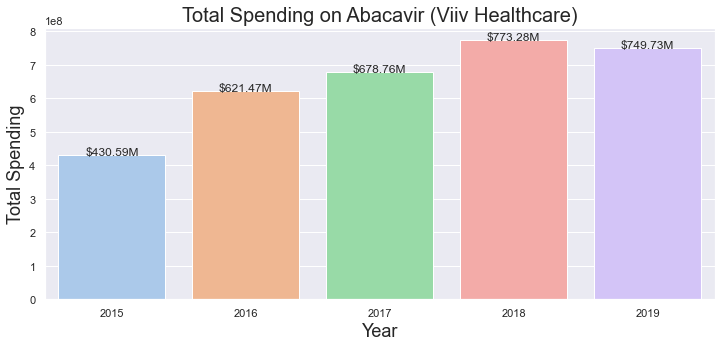

In [52]:
fig = plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Manufacturer'].str.match('.*[Vv]iiv.*'))], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir (Viiv Healthcare)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+10, s = '${}M'.format(round(p.get_height()/1000000, 2)), ha = 'center')

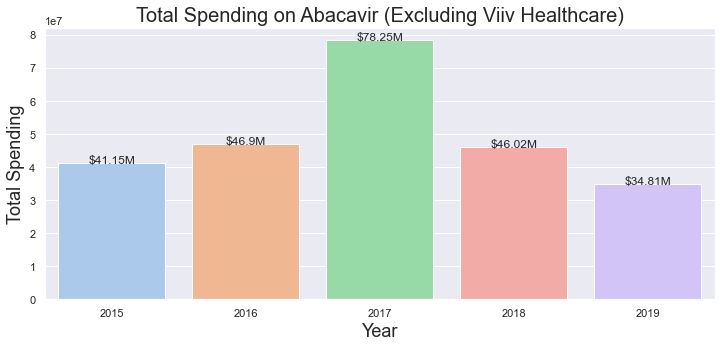

In [53]:
fig = plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & ((df2['Manufacturer'].str.match('.*[Vv]iiv.*') == False))], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir (Excluding Viiv Healthcare)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+10, s = '${}M'.format(round(p.get_height()/1000000, 2)), ha = 'center')

Viiv Healthcare's dominance in the Part D abacavir market can be seen by the significant proportion of CMS spend on Viiv's abacavir products.  Let's see which brand is the highest selling among Viiv's abacavir portfolio.

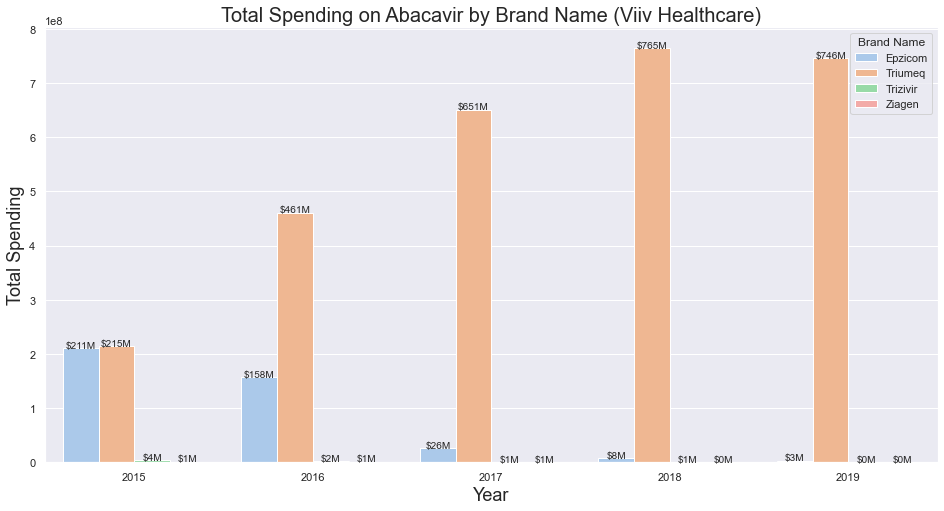

In [54]:
fig = plt.figure(figsize=(16, 8))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Manufacturer'].str.match('.*[Vv]iiv.*'))], x='Year', y='Total Spending', hue = 'Brand Name', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir by Brand Name (Viiv Healthcare)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2), y = p.get_height()+10, s = '${}M'.format(round(p.get_height()/1000000)), ha = 'center', fontsize=10)

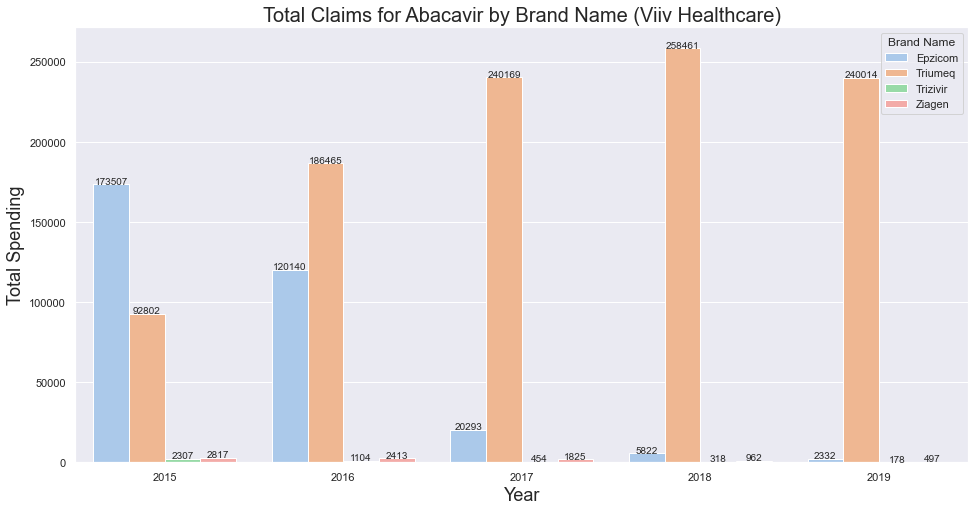

In [55]:
fig = plt.figure(figsize=(16, 8))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Manufacturer'].str.match('.*[Vv]iiv.*'))], x='Year', y='Total Claims', hue = 'Brand Name', estimator=sum, ci=None)
ax.set_title('Total Claims for Abacavir by Brand Name (Viiv Healthcare)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = p.get_height()+110,
    s = '{}'.format(round(p.get_height())),
    ha = 'center',
    fontsize=10)

Triumeq seems to be the clear leader in the abacavir market, comprising the majority of speand each year with increasing spend in all years but 2019.  Triumeq is a triple therapy of abacavir in combination with Dolutegravir and Lamivudine - it seems there are several double and triple therapy combinations as well, all in combination with Lamivudine.  Let's take a look at any other trends in single vs combination therapies.

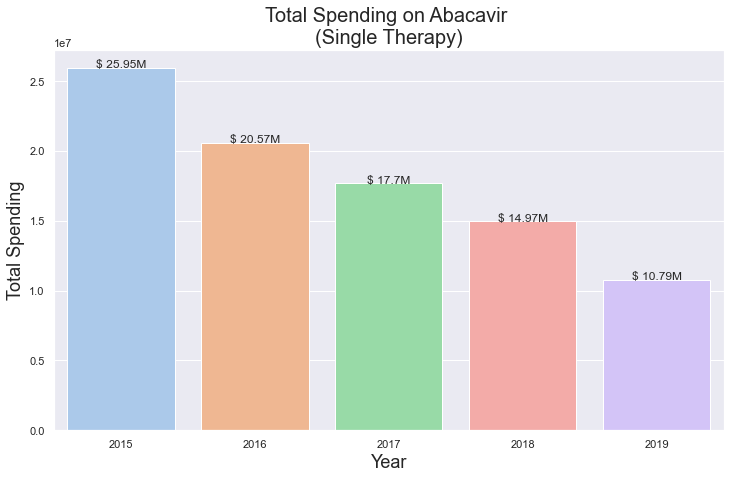

In [56]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Generic Name'].str.match('.*Lamivud.*') == False)], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir \n(Single Therapy)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = p.get_height()+110,
    s = '$ {}M'.format(round(p.get_height()/1000000, 2)), 
    ha = 'center')

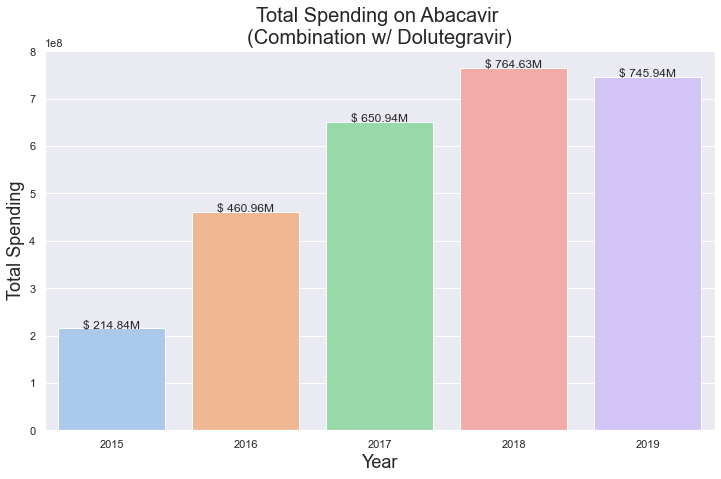

In [57]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Generic Name'].str.match('.*[Dd]olutegravir.*'))], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir \n(Combination w/ Dolutegravir)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)
for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = p.get_height()+110,
    s = '$ {}M'.format(round(p.get_height()/1000000, 2)), 
    ha = 'center')

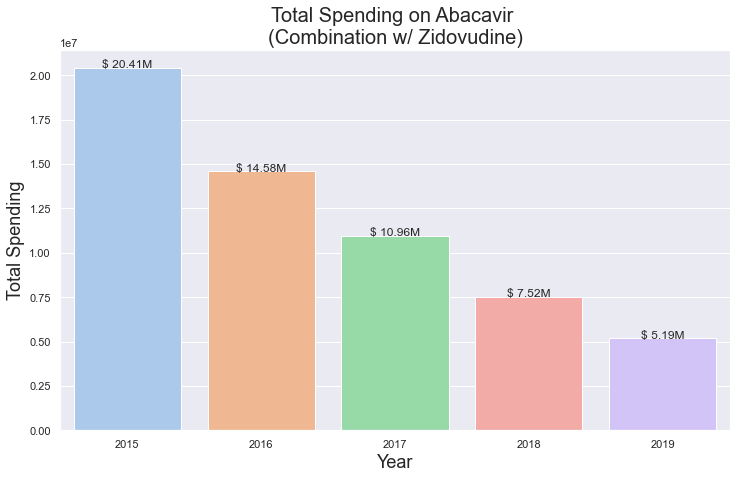

In [58]:
fig = plt.figure(figsize=(12, 7))

ax = sns.barplot(data=df2[(df2['Generic Name'].str.match('.*[Aa]bacavir.*')) & (df2['Generic Name'].str.match('.*[Zz]idovudine.*'))], x='Year', y='Total Spending', estimator=sum, ci=None)
ax.set_title('Total Spending on Abacavir \n(Combination w/ Zidovudine)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Spending', fontsize=18)

for p in ax.patches:
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = p.get_height()+110,
    s = '$ {}M'.format(round(p.get_height()/1000000, 2)), 
    ha = 'center')

It appears abacavir as a single therapy is a miniscule proportion of the CMS market compared to double and triple combination therapy abacavir, which is led by Viiv Healthcare by a wide margin. Total spending on single therapy Abacavir Sulfate and combination Zidovudine have decreased year over year since 2015, with combination Dolutegravir driving spend in this space.

I will now take a look at a specific manufacturer, Gilead Sciences, a manufacturer of products in the HIV, hepatitis B/C, and oncology spaces.

# Gilead Analysis

In [59]:
df_gilead = df2[df2['Manufacturer'].str.match('[Gg]ilead.')].groupby(by=['Manufacturer', 'Year', 'Brand Name', 'Generic Name'])['Total Spending', 'Total Claims'].sum().reset_index()
df_gilead.head()

<ipython-input-59-19dfe3f90e18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gilead = df2[df2['Manufacturer'].str.match('[Gg]ilead.')].groupby(by=['Manufacturer', 'Year', 'Brand Name', 'Generic Name'])['Total Spending', 'Total Claims'].sum().reset_index()


,Manufacturer,Year,Brand Name,Generic Name,Total Spending,Total Claims
0,Gilead Sciences,2015,Atripla,Efavirenz/Emtricit/Tenofovr Df,589704409.0,251058.0
1,Gilead Sciences,2015,Biktarvy,Bictegrav/Emtricit/Tenofov Ala,0.0,0.0
2,Gilead Sciences,2015,Cayston,Aztreonam Lysine,19610692.0,2921.0
3,Gilead Sciences,2015,Complera,Emtricita/Rilpivirine/Tenof Df,176875105.0,78116.0
4,Gilead Sciences,2015,Descovy,Emtricitabine/Tenofov Alafenam,0.0,0.0


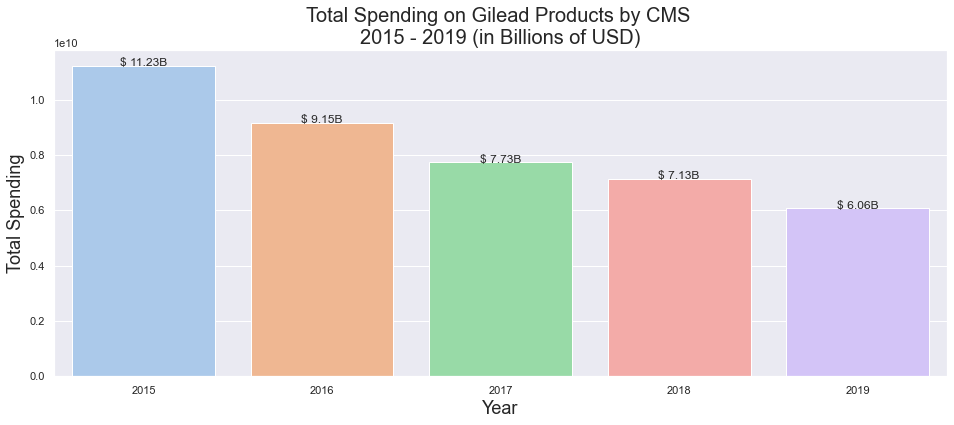

In [60]:
fig = plt.figure(figsize=(16, 6))
barsito = sns.barplot(data = df_gilead, x='Year', y='Total Spending', ci=None, estimator=sum)
barsito.set_title('Total Spending on Gilead Products by CMS \n2015 - 2019 (in Billions of USD)', fontsize=20)
barsito.set_xlabel('Year', fontsize=18)
barsito.set_ylabel('Total Spending', fontsize=18)

for p in barsito.patches:
    barsito.text(x = p.get_x()+(p.get_width()/2),
    y = p.get_height()+110, 
    s = '$ {}B'.format(round(p.get_height()/1000000000, 2)),
    ha = 'center')

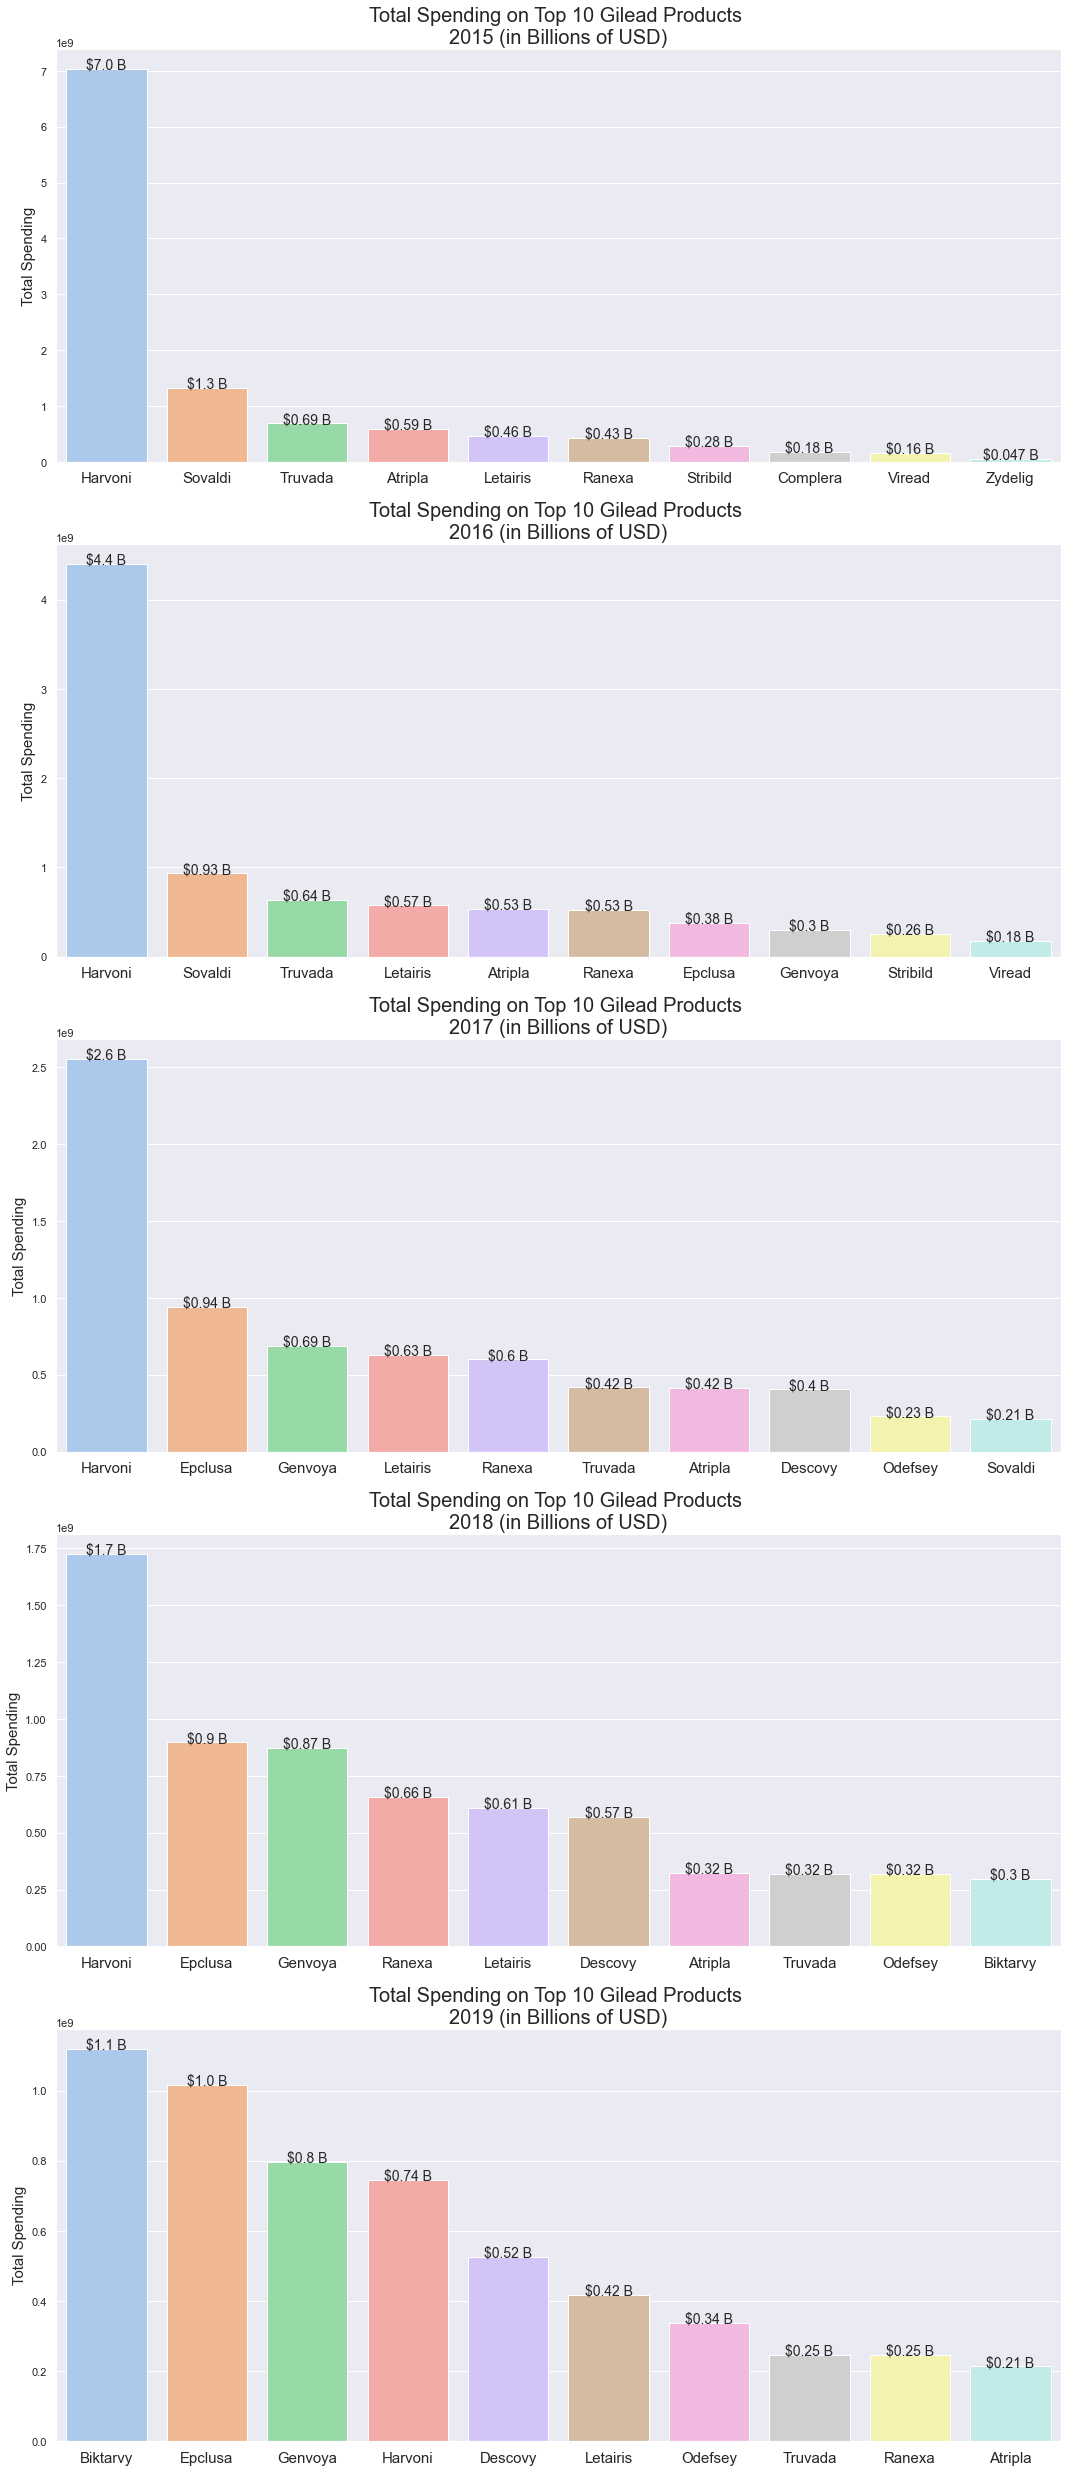

In [61]:
fig = plt.figure(figsize=(18, 44)).tight_layout(h_pad=4.0, w_pad=2.0)

plt.subplot(511)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2015].sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum, ci=None)
bar1.set_title('Total Spending on Top 10 Gilead Products \n2015 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Spending', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2), 
    y = height+10,
    s = '${0:.2} B'.format(height/1000000000),
    ha = 'center',
    fontsize=14)
    
plt.subplot(512)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2016].sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum, ci=None)
bar1.set_title('Total Spending on Top 10 Gilead Products \n2016 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Spending', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2),
    y = height+10, 
    s = '${0:.2} B'.format(height/1000000000), 
    ha = 'center',
    fontsize=14) 

plt.subplot(513)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2017].sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum, ci=None)
bar1.set_title('Total Spending on Top 10 Gilead Products \n2017 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Spending', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2),
    y = height+10, 
    s = '${0:.2} B'.format(height/1000000000), 
    ha = 'center',
    fontsize=14) 

plt.subplot(514)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2018].sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum, ci=None)
bar1.set_title('Total Spending on Top 10 Gilead Products \n2018 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Spending', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2),
    y = height+10, 
    s = '${0:.2} B'.format(height/1000000000), 
    ha = 'center',
    fontsize=14) 

plt.subplot(515)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2019].sort_values(by='Total Spending', ascending=False).head(10), x='Brand Name', y='Total Spending', estimator=sum, ci=None)
bar1.set_title('Total Spending on Top 10 Gilead Products \n2019 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Spending', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2),
    y = height+10, 
    s = '${0:.2} B'.format(height/1000000000), 
    ha = 'center',
    fontsize=14) 

Within 5 years total CMS spend on Harvoni declined by over USD 6 billion.  From 2018 to 2019, Biktarvy, indicated for treatment of HIV, overtook all other Gilead products to reach highest total CMS spend at USD 1.1 billion. I want to see what Harvoni is indicated for, using the df_indication dataset.

In [62]:
df_indication.head()

,Brand Name,Generic Name,Drug Uses**
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Drug uses not available
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Drug uses not available
2,Abacavir,Abacavir Sulfate,This drug is used with other HIV medications t...
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,This product contains 2 drugs: abacavir and la...
4,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,"This product contains 3 drugs: abacavir, lamiv..."


In [63]:
list(df_indication[df_indication['Brand Name'].str.contains('.*[Hh]arvoni.*')]['Drug Uses**'])[0]

'This medication is a combination of ledipasvir and sofosbuvir and is used to treat chronic (long-lasting) hepatitis C, a viral infection of the liver. It may sometimes be used with another antiviral medication (ribavirin). These drugs work by reducing the amount of hepatitis C virus in your body, which helps your immune system fight the infection and may help your liver recover. Chronic hepatitis C infection can cause serious liver problems such as scarring (cirrhosis), or liver cancer. It is not known if this treatment can prevent you from passing the virus to others. Do not share needles, and practice "safer sex" (including the use of latex condoms) to lower the risk of passing the virus to others. NOTE:  This is a summary and does NOT have all possible information about this product. This information does not assure that this product is safe, effective, or appropriate for you. This information is not individual medical advice and does not substitute for the advice of your health ca

It appears Harvoni is a treatment for chronic hepatitis C.  I now want to see the top 10 Gilead drugs by number of claims across the 5 year period.

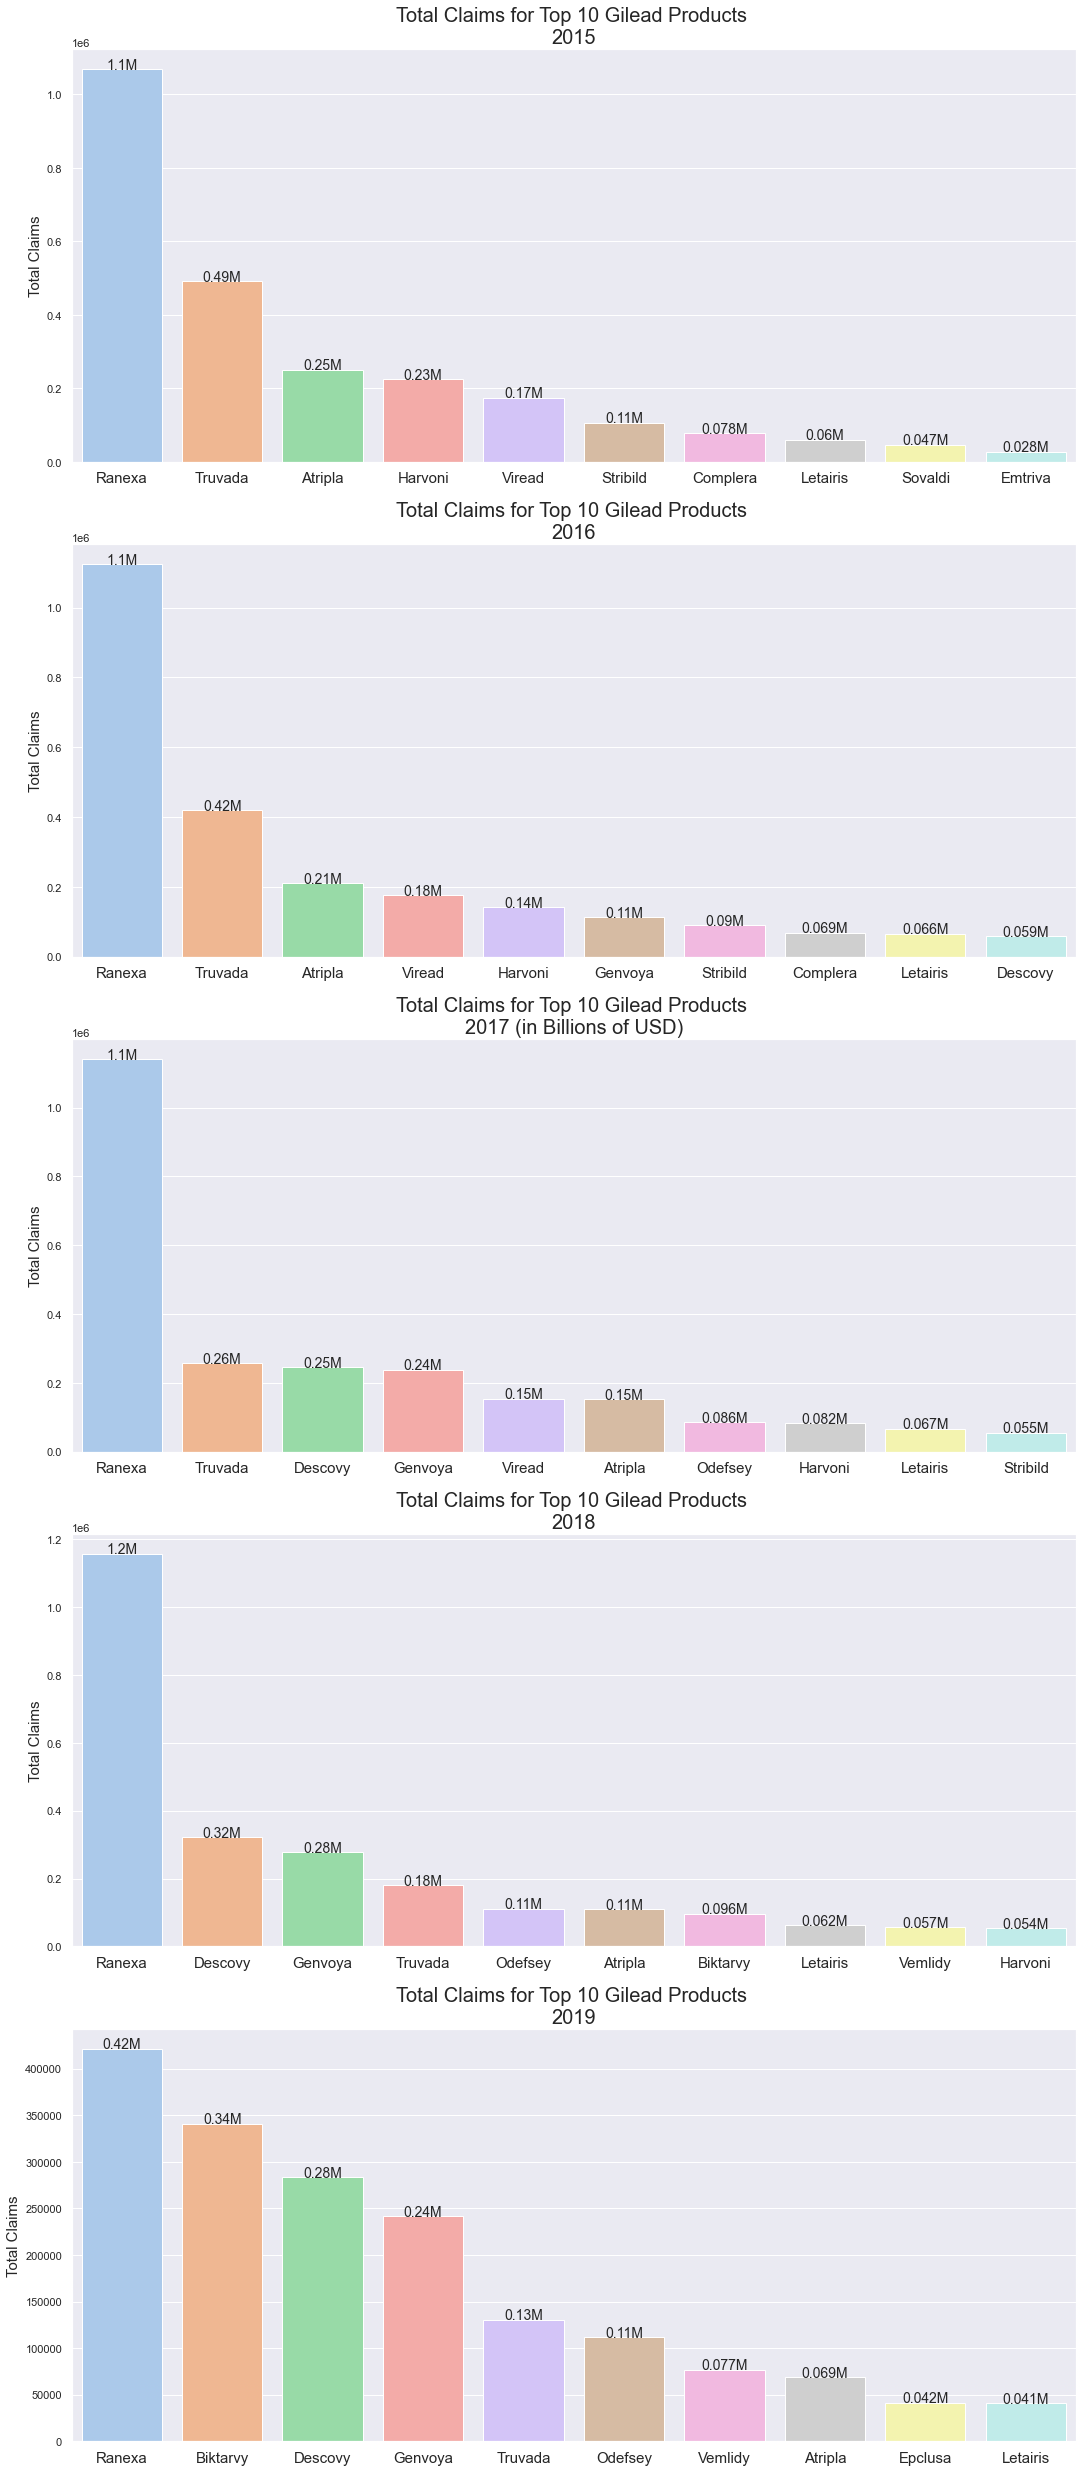

In [64]:
fig = plt.figure(figsize=(18, 44)).tight_layout(h_pad=4.0, w_pad=2.0)

plt.subplot(511)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2015].sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
bar1.set_title('Total Claims for Top 10 Gilead Products \n2015', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Claims', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2), 
    y = height+10,
    s = '{0:.2}M'.format(height/1000000), 
    ha = 'center',
    fontsize=14)
    
plt.subplot(512)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2016].sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
bar1.set_title('Total Claims for Top 10 Gilead Products \n2016', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Claims', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2), 
    y = height+10, 
    s = '{0:.2}M'.format(height/1000000), 
    ha = 'center',
    fontsize=14) 

plt.subplot(513)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2017].sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
bar1.set_title('Total Claims for Top 10 Gilead Products \n2017 (in Billions of USD)', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Claims', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2), 
    y = height+10, 
    s = '{0:.2}M'.format(height/1000000),
    ha = 'center',
    fontsize=14)

plt.subplot(514)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2018].sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
bar1.set_title('Total Claims for Top 10 Gilead Products \n2018', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Claims', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2), 
    y = height+150, 
    s = '{0:.2}M'.format(height/1000000), 
    ha = 'center',
    fontsize=14) 

plt.subplot(515)

bar1 = sns.barplot(data = df_gilead[df_gilead['Year'] == 2019].sort_values(by='Total Claims', ascending=False).head(10), x='Brand Name', y='Total Claims', estimator=sum, ci=None)
bar1.set_title('Total Claims for Top 10 Gilead Products \n2019', fontsize=20)
bar1.set_xlabel('', fontsize=15)
bar1.set_ylabel('Total Claims', fontsize=15)
bar1.set_xticklabels(bar1.get_xticklabels(),fontsize=15)

for item in bar1.get_xticklabels():
    item.set_rotation(0)

for p in bar1.patches:
    height = p.get_height()
    bar1.text(x = p.get_x()+(p.get_width()/2),
    y = height+10,
    s = '{0:.2}M'.format(height/1000000),
    ha = 'center',
    fontsize=14)

Gilead's Ranexa has led total claims across Gilead's portfolio since 2015, though total claims decreased by roughly two thirds in 2019 (1.2 million to 0.42 million).

This concludes my exploratory analysis of the CMS Part D Spending and Utilization dataset - I hope you found some of these insights helpful.  There are a multitude of different insights that can be obtained from this data, which I intend to explore further in future iterations of this research.